# VALIDACIÓN CRUZADA DE (GLM Y KNN)  - BOOTSTRAP
### Oscar Julian Layton G

El término de validación cruzada incluye una clase de métodos que estiman el **test error rate** (no conocemos el verdadero test error) excluyendo una parte de las observaciones en el proceso de ajuste del modelo, usando luego dichas observaciones para evaluar la capacidad predictiva del modelo (en el cual caso es de interés el valor específico del test error rate) o seleccionar un nivel de flexibilidad del mismo (en el cual caso interesa más determinar a qué nivel de flexibilidad se encuentra el mínimo en la curva de estimación del test error rate).

     La diferencia principal entre un método u otro es la forma en la que se generan los grupos de entrenamiento y test.
     
El método de validación simple se basa en dividir de manera aleatoria (y tamaño comparable) el set de observaciones disponible en dos partes, el set de entrenamiento o training set y el set de validación o test set. El modelo es ajustado usando el set de entrenamiento, y este mismo modelo se usa para predecir las nuevas observaciones del test set, obteniendo así la estimación del test error rate (Mean Squared Error o MSE para variables respuesta cuantitativas, y proporción de predicciones incorrectas sobre las predicciones totales en el caso de variables respuesta cualitativas).

Procedase el siguiente ejemplo:

In [174]:
getwd()
setwd("C:\\Users\\YULY\\Desktop\\Desktop\\markdpwn CLASIFICACION\\Validadción cruzada")#asignando capeta busqueda
library(readxl)
dataset <- read.csv("pulsar_stars.csv")  

[1] "C:/Users/YULY/Desktop/Desktop/markdpwn CLASIFICACION/Validadción cruzada"

In [175]:
head(dataset)

Mean.of.the.integrated.profile,Standard.deviation.of.the.integrated.profile,Excess.kurtosis.of.the.integrated.profile,Skewness.of.the.integrated.profile,Mean.of.the.DM.SNR.curve,Standard.deviation.of.the.DM.SNR.curve,Excess.kurtosis.of.the.DM.SNR.curve,Skewness.of.the.DM.SNR.curve,target_class
140.56250,55.68378,-0.23457141,-0.6996484,3.199833,19.11043,7.975532,74.24222,0
102.50781,58.88243,0.46531815,-0.5150879,1.677258,14.86015,10.576487,127.39358,0
103.01562,39.34165,0.32332837,1.0511644,3.121237,21.74467,7.735822,63.17191,0
136.75000,57.17845,-0.06841464,-0.6362384,3.642977,20.95928,6.896499,53.59366,0
88.72656,40.67223,0.60086608,1.1234917,1.178930,11.46872,14.269573,252.56731,0
93.57031,46.69811,0.53190485,0.4167211,1.636288,14.54507,10.621748,131.39400,0


Como podemos observar, el conjunto de datos tiene 17898 observaciones y 9 variables en cada una. Específicamente, este dataset contiene información estadística de estrellas pulsares obtenidos por el trabajo High Time Resolution Universe Survey, y cuyas variables son:

* Media del perfil integrado
* Desviaciación estándar del perfil integrado
* Exceso de curtosis del perfil integrado
* Asimetría del perfil integrado
* Media de la curva DM-SNR
* Desviación estánndar de la curva DM-SNR
* Exceso de curtosis de la curva DM-SNR
* Asimetría de la curva DM-SNR
* Clase de la estrella
* En este caso, la clase especifica con 1 si se trata de una estrella pulsar, y con 0 si no lo es.

Nuestro objetivo en esta práctica será hacer uso de todas estas variables para construir modelos de clasificación capaces de predecir si una estrella es Pulsar o NoPulsar. En este caso se usará la regresión logística y se validará mediante **VALIDACIÓN CRUZADA.**

Considerando que la variable de respuesta **target_class** es categórica con niveles (Pulsar y NoPulsar) , se procede a caracterizarla mediante una variable dummie, también le cambiaremos el nombre por tipo de estrella.

In [176]:
colnames(dataset)[9] <- "TipoEstrella"
dataset$TipoEstrella <- factor(dataset$TipoEstrella, levels = c("0", "1"), labels = c("NoPulsar", "Pulsar"))
summary(dataset)

 Mean.of.the.integrated.profile Standard.deviation.of.the.integrated.profile
 Min.   :  5.812                Min.   :24.77                               
 1st Qu.:100.930                1st Qu.:42.38                               
 Median :115.078                Median :46.95                               
 Mean   :111.080                Mean   :46.55                               
 3rd Qu.:127.086                3rd Qu.:51.02                               
 Max.   :192.617                Max.   :98.78                               
 Excess.kurtosis.of.the.integrated.profile Skewness.of.the.integrated.profile
 Min.   :-1.8760                           Min.   :-1.7919                   
 1st Qu.: 0.0271                           1st Qu.:-0.1886                   
 Median : 0.2232                           Median : 0.1987                   
 Mean   : 0.4779                           Mean   : 1.7703                   
 3rd Qu.: 0.4733                           3rd Qu.: 0.9278             

Por otro lado, se observa también que existe cierta variabilidad y diferencias de escala entre los valores mínimos y máximos de los registros medidos, por lo que es conveniente, antes de aplicar los modelos de regresión, el rescalar las variables numéricas a fin de que ninguna tenga mayor influencia sobre otra como predictor al momento de construir los modelos de clasificación. Entonces, usemos la función scale:

In [177]:
dataset[, c(1:8)] <- scale(dataset[, c(1:8)])
summary(dataset)

 Mean.of.the.integrated.profile Standard.deviation.of.the.integrated.profile
 Min.   :-4.1035                Min.   :-3.18236                            
 1st Qu.:-0.3957                1st Qu.:-0.60988                            
 Median : 0.1559                Median : 0.05815                            
 Mean   : 0.0000                Mean   : 0.00000                            
 3rd Qu.: 0.6239                3rd Qu.: 0.65374                            
 Max.   : 3.1785                Max.   : 7.63232                            
 Excess.kurtosis.of.the.integrated.profile Skewness.of.the.integrated.profile
 Min.   :-2.212200                         Min.   :-0.5775                   
 1st Qu.:-0.423630                         1st Qu.:-0.3176                   
 Median :-0.239293                         Median :-0.2548                   
 Mean   : 0.000000                         Mean   : 0.0000                   
 3rd Qu.:-0.004259                         3rd Qu.:-0.1366             

### Creando conjunto de entrenamiento y validación

Por último, vamos a crear un conjunto de entrenamiento (75%) y un conjunto de validación (25%) a partir de nuestro dataset original, esto con la intención de validar la calidad de la clasificación de los modelos que implementemos. Para esto, hagamos uso de la función sample.split del paquete caTools:

In [178]:
library(caTools)            #instalado desde el repositorio "https://cloud.r-project.org"
set.seed(1234)
split <- sample.split(dataset$TipoEstrella, SplitRatio = 0.75)
training_set <- subset(dataset, split == TRUE)
test_set <- subset(dataset, split == FALSE)

A fin de asegurarnos de que la proporción de estrellas pulsares y no pulsares es aproximadamente la misma en ambos conjuntos de datos, veamos la distribución de los tipos de estrella en cada uno:

In [179]:
table(training_set$TipoEstrella)


NoPulsar   Pulsar 
   12194     1229 

In [180]:
table(test_set$TipoEstrella)


NoPulsar   Pulsar 
    4065      410 

En efecto, vemos que para ambos conjuntos, la relación NoPulsar/Pulsar es alrededor de 9.9, de modo que la proporción se mantiene. Ya que nuestro conjunto de datos está listo y preparado, podemos comenzar a construir nuestros modelos de clasificación.

### Clasificación mediante regresión

In [181]:
clasificadorRL <- glm(TipoEstrella ~ ., family = binomial, data = training_set)

In [182]:
pred_train <- predict(clasificadorRL, type = 'response', ndata = training_set)
pred_train <- ifelse(pred_train > 0.5, 1, 0)                                    #establece 0 o 1 a los valores de pred_train
pred_train <- factor(pred_train, levels = c("0", "1"), labels = c("NoPulsar", "Pulsar"))  #establece "NoPulsar", "Pulsar" a 1,0
head(pred_train,n=20)

1        2        3        4        6        7        8        9 
NoPulsar NoPulsar NoPulsar NoPulsar NoPulsar NoPulsar NoPulsar NoPulsar 
      10       11       12       13       15       17       18       19 
NoPulsar NoPulsar NoPulsar NoPulsar NoPulsar NoPulsar NoPulsar NoPulsar 
      20       21       22       23 
  Pulsar NoPulsar NoPulsar NoPulsar 
Levels: NoPulsar Pulsar

Ahora, podemos construir la matriz de confusión para evaluar la calidad de la predicción:

In [183]:
matrizConfusion <- table(training_set$TipoEstrella, pred_train)
matrizConfusion

          pred_train
           NoPulsar Pulsar
  NoPulsar    12127     67
  Pulsar        206   1023

Para el caso del conjunto de entrenamiento, tendremos un total de **13150 predicciones correctas**, mientras que habrá un total de **273 predicciones incorrectas**. Esto nos da una precisión de predicción de 0.979 y un error de predicción de 0.02.

Ahora bien, al aplicar el clasificador al conjunto de validación:

In [229]:
pred_valid <- predict(clasificadorRL, type = 'response', newdata = test_set)
pred_valid <- ifelse(pred_valid > 0.5, 1, 0)
pred_valid <- factor(pred_valid, levels = c("0", "1"), labels = c("NoPulsar", "Pulsar"))
matrizConfusion <- table(test_set$TipoEstrella, pred_valid)
matrizConfusion

          pred_valid
           NoPulsar Pulsar
  NoPulsar     4047     18
  Pulsar         80    330

Tenemos 4047 +330 = 4377 predicciones correctas, y 80 + 18 = 98 incorrectas, lo que representa una **precisión de predicción de 97.8%** y un **error de predicción del 2.18%**.

In [230]:
# Test error rate
mean(pred_valid != test_set$TipoEstrella)

[1] 0.02189944

La estimación del **test error rate** del modelo mediante validación simple es del 2,18%, por lo que el modelo acierta con sus predicciones en un 1 – 0,0218 = 97,82% de los casos.

Sin embargo, como se ha comentado en la explicación inicial, la estimación del test error rate mediante validación simple es propenso a sufrir alta variabilidad (depende de cómo se hayan distribuido las observaciones en los grupos de entrenamiento y test). A continuación, se muestra el mismo proceso llevado a cabo anteriormente, repitiéndolo 100 veces (en cada iteración los datos se van a repartir de manera distinta en entrenamiento y test).

In [242]:
# Vector donde se almacenarán los 100 test error estimados
cv.error <- rep(0, 100)
set.seed(1)
for (i in 1:100){
# importante la creación de nuevos índices para cada iteración, de lo contrario, el test error obtenido siempre sería el mismo
indices.train <- sample(x = nrow(dataset), size = 0.5*(nrow(dataset)),replace = FALSE) #toma una muestra del 50%
training_set <- dataset[indices.train, ]
datos.test <- dataset[-indices.train, ]
modelo.logistico <- glm(TipoEstrella ~ ., data = training_set, family = "binomial")
prob.modelo <- predict(object = modelo.logistico, newdata = datos.test, type = "response")
pred.modelo <- rep('NoPulsar', length(prob.modelo))
pred.modelo[prob.modelo > 0.5] <- 'Pulsar'
cv.error[i] <- mean(pred.modelo != datos.test$TipoEstrella)
}
summary(cv.error)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.01766 0.02023 0.02078 0.02087 0.02168 0.02391 

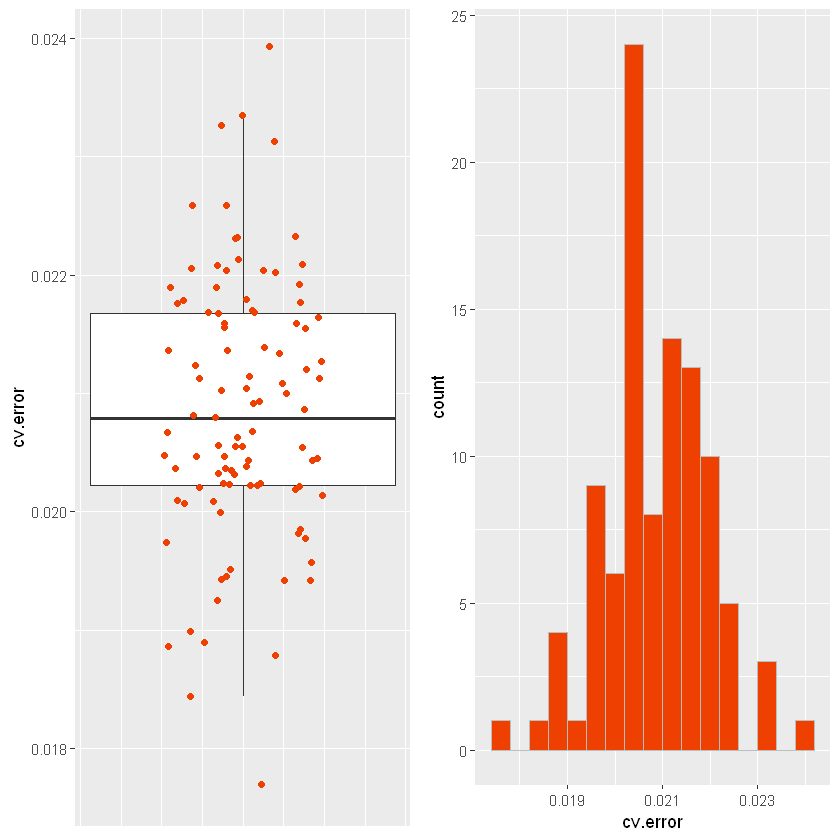

In [243]:
library(ggplot2)
library(gridExtra)

boxplot <- ggplot(data = data.frame(cv.error = cv.error), aes(x = 1, y = cv.error)) +
geom_boxplot(outlier.shape = NA) +
geom_jitter(colour = c("orangered2"), width = 0.2) +
theme(axis.title.x = element_blank(),axis.text.x = element_blank(), 
      axis.ticks.x = element_blank())

histograma <- ggplot(data = data.frame(cv.error = cv.error), aes(x = cv.error)) +
geom_histogram(color = "grey", fill = "orangered2", binwidth  =  0.0004)

grid.arrange(boxplot, histograma, ncol = 2)


Como resultado de las 100 iteraciones, la estimación del test error oscila entre el 1,17% y el 2.39%, con una media del 2.08%, por lo que el porcentaje de acierto es del 97,92%.

# Clasificación por vecinos más cercanos CNN

La clasificación por k vecinos cercanos o k-NN es un modelo de clasificación que basa su entrenamiento en el cálculo de las distancias de un nuevo dato o dato al que se desee asignar a una clase, con la mayoría de clases a las que pertenezcan sus k vecinos más cercanos, siendo k un parámetro del algoritmo.

Para construir el clasificador k-NN vamos a hacer uso de la función knn del paquete class, y tomaremos como valor de k = 10:

In [268]:
library(class)
set.seed(1234)
pred_valid_knn <- knn(training_set[, -9], 
                      test_set[, -9], 
                      cl = training_set[, 9],
                      k = 10)

Y una vez contamos con las predicciones para el conjunto de validación, podemos crear nuestra matriz de confusión:

In [269]:
matrizConfusion <- table(test_set$TipoEstrella, pred_valid_knn)
matrizConfusion

          pred_valid_knn
           NoPulsar Pulsar
  NoPulsar     4048     17
  Pulsar         85    325

Lo que nos arroja una precisión de predicción de 97.61% y un error de predicción de 2.39% para el conjunto de validación.

### No obstante se puede especificar que el mejor método para clasificar está determinado por la regresión logistica la cual especifica un error de predicción mucho más pequeño que el CNN

## BOOTSTRAP

Bootstrap: se puede usar en muchos contextos (como para el cálculo de la significancia estadística), comúnmente se aplica a la evaluación de la precisión de la estimación de parámetros de un determinado modelo de aprendizaje estadístico (error estándar, intervalos de confianza…).


 El método de bootstrap se puede aplicar para cuantificar la incertidumbre asociada a un determinado estimador o método de aprendizaje estadístico. Por ejemplo, se puede utilizar para estimar el error estándar (SE) de los coeficientes de un modelo de regresión lineal (en este caso se utilizan fórmulas matemáticas que R implementa automáticamente, aunque el resultado sería válido siempre y cuando las condiciones para su aplicación se cumplan, mientras que el bootstrap no requiere de condiciones previas).

 En la práctica, raramente se puede disponer reiteradamente de nuevas muestras o set de datos independientes de la población original. El bootstrap lo que nos permite es emular el proceso de obtención de nuevas muestras utilizando nuestro set de datos único con las que podemos por ejemplo estimar la variabilidad/precisión asociada a un parámetro estimado, sin la necesidad de repetir el muestreo (cuando esto no es posible). El muestreo se lleva a cabo con sustitución (with replacement), lo que implica que una misma observación puede ser seleccionada más de una vez dentro de un mismo set de datos de bootstrap, y el tamaño de cada pseudomuestra es del mismo tamaño que la muestra original.

In [276]:
set.seed(1)
# Función que devuelve las estimaciones de los coeficientes del modelo. Con “index” se seleccionan las observaciones para la muestra bootstrap
fun.boot <- function(data, index) {
modelo.glm <- glm(TipoEstrella ~ ., data = data, family = "binomial",subset = index)
return (coef(modelo.glm))
}

# Bootstrap con 1000 pseudomuestras
library(boot)
estimacion.boot <- boot(data = dataset, statistic = fun.boot, R = 1000)
estimacion.boot


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = dataset, statistic = fun.boot, R = 1000)


Bootstrap Statistics :
      original       bias    std. error
t1* -4.3184321 -0.015316440  0.09299499
t2*  0.7762571  0.005078300  0.15195950
t3* -0.2424564  0.003674477  0.07937251
t4*  6.9982561  0.011789005  0.34682460
t5* -3.8009360  0.015447531  0.22399275
t6* -0.8424697  0.016503593  0.12861553
t7*  1.0351675  0.003170584  0.17092091
t8*  0.2151600  0.081787647  0.47712577
t9* -0.5059092 -0.101160240  0.45446635

In [278]:
summary(clasificadorRL)$coef

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),-4.3760470,0.1074333,-40.7326907,0.000000e+00
Mean.of.the.integrated.profile,0.8333186,0.1788293,4.6598547,3.164327e-06
Standard.deviation.of.the.integrated.profile,-0.2653937,0.0849129,-3.1254819,1.775140e-03
Excess.kurtosis.of.the.integrated.profile,6.9240414,0.3736789,18.5293866,1.196431e-76
Skewness.of.the.integrated.profile,-3.7841241,0.2834935,-13.3481885,1.213644e-40
Mean.of.the.DM.SNR.curve,-0.8231125,0.1173572,-7.0137342,2.320401e-12
Standard.deviation.of.the.DM.SNR.curve,0.9054960,0.1686837,5.3680125,7.960902e-08
Excess.kurtosis.of.the.DM.SNR.curve,-0.2494299,0.5165042,-0.4829194,6.291529e-01
Skewness.of.the.DM.SNR.curve,-0.2337652,0.4800787,-0.4869310,6.263072e-01


  Si compararemos los estimadores del error estándar para cada coeficiente obtenidos mediante bootstrap con los que se obtiene mediante la fórmula del error estándar usada por el modelo glm(), podemos ver que obtenemos valores casi iguales:

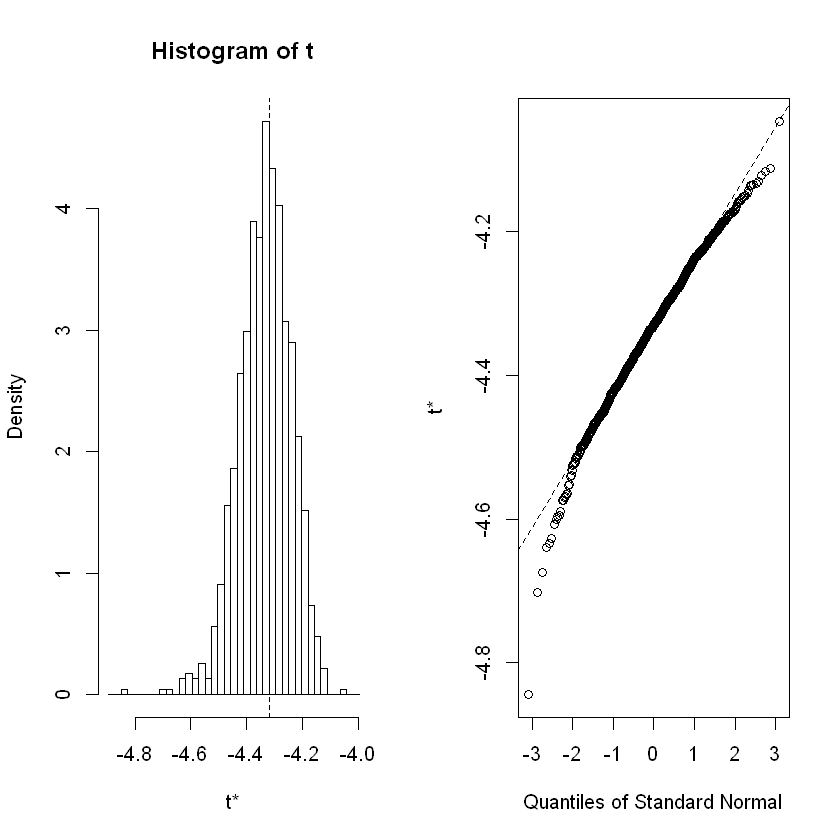

In [279]:
plot(estimacion.boot, index = 1)

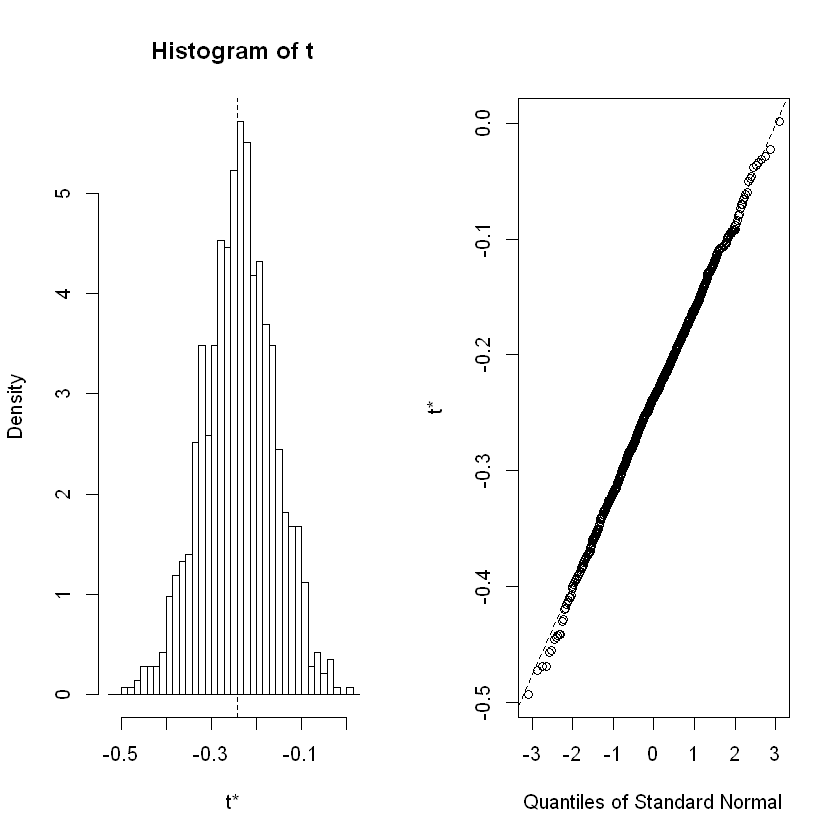

In [281]:
plot(estimacion.boot, index = 3)

In [282]:
# Intervalo de confianza para Intercept
boot.ci(boot.out = estimacion.boot, type = "norm", index = 1)   #variar index

BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 1000 bootstrap replicates

CALL : 
boot.ci(boot.out = estimacion.boot, type = "norm", index = 1)

Intervals : 
Level      Normal        
95%   (-4.485, -4.121 )  
Calculations and Intervals on Original Scale

## NOTA:   

Para instalar librerias de R en jupyter notebooks usamos la siguiente linea 

* install.packages("ISLR", "/home/user/anaconda3/lib/R/library")  no usar este comando
* install.packages("sm", "/Users/YULY/anaconda/Lib/R/library")

Para más información verificar el siguiente enlace::

https://www.pythond.com/23094/conda-como-instalar-paquetes-r-que-no-estan-disponibles-en-r-essentials.html

* También puede usarse el siguiente comando desde r para instalar el entorno de r 

* install.packages("CASdatasets", "/Users/YULY/anaconda/Lib/R/library",repos = "http://cas.uqam.ca/pub/R/")
* install.packages("ROCR", "/Users/YULY/anaconda/Lib/R/library",repos = "https://cloud.r-project.org")


#### Páginas importantes

* https://rpubs.com/rdelgado/405322
* https://rpubs.com/Cristina_Gil/CV_Bootstrap
* http://pages.stat.wisc.edu/~larget/stat302/chap3.pdf
* https://rpubs.com/rdelgado
* https://librovivodecienciadedatos.ai/desempe%C3%B1o-modelo.html#conociendo_el_error
* https://rpubs.com/Cristina_Gil/CV_Bootstrap